In [1]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
IMAGE_SIZE = 256
CHANNELS = 3 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
) 

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 1506 images belonging to 3 classes.


In [7]:
for image_batch, label_batch in train_generator :
    print (image_batch[0])
    break 

[[[0.6745098  0.6509804  0.65882355]
  [0.674871   0.6513416  0.65918475]
  [0.6762166  0.6526872  0.6605303 ]
  ...
  [0.5627437  0.523528   0.52744955]
  [0.55723804 0.51055443 0.51821   ]
  [0.57921094 0.5321521  0.53999525]]

 [[0.67526037 0.6517309  0.65957403]
  [0.6745098  0.6509804  0.65882355]
  [0.6745098  0.6509804  0.65882355]
  ...
  [0.5645244  0.5251273  0.5291396 ]
  [0.5573517  0.5102929  0.518136  ]
  [0.5796698  0.53239423 0.5403096 ]]

 [[0.68983936 0.66630995 0.6741531 ]
  [0.6898332  0.6663038  0.67414695]
  [0.6887567  0.6652273  0.67307043]
  ...
  [0.56398624 0.52405083 0.52833223]
  [0.5589664  0.5119076  0.5197507 ]
  [0.57697856 0.5288957  0.5370802 ]]

 ...

 [[0.7242995  0.7007701  0.7086132 ]
  [0.7108557  0.6873263  0.69516945]
  [0.7276126  0.70408314 0.71192634]
  ...
  [0.6170522  0.5935228  0.60920906]
  [0.62189627 0.59836686 0.61405313]
  [0.62352943 0.6        0.6156863 ]]

 [[0.7221466  0.69861716 0.7064603 ]
  [0.7100484  0.68651897 0.6943621 ]


In [10]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
) 

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 215 images belonging to 3 classes.


In [12]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
) 

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 431 images belonging to 3 classes.


In [13]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 87s 2s/step - loss: 0.9336 - accuracy: 0.4827 - val_loss: 0.9068 - val_accuracy: 0.4427
Epoch 2/20
47/47 [==============================] - 67s 1s/step - loss: 0.8150 - accuracy: 0.5794 - val_loss: 0.7670 - val_accuracy: 0.5990
Epoch 3/20
47/47 [==============================] - 67s 1s/step - loss: 0.5501 - accuracy: 0.7761 - val_loss: 0.4508 - val_accuracy: 0.8281
Epoch 4/20
47/47 [==============================] - 67s 1s/step - loss: 0.3687 - accuracy: 0.8480 - val_loss: 0.3126 - val_accuracy: 0.8854
Epoch 5/20
47/47 [==============================] - 68s 1s/step - loss: 0.3019 - accuracy: 0.8826 - val_loss: 0.3465 - val_accuracy: 0.8438
Epoch 6/20
47/47 [==============================] - 67s 1s/step - loss: 0.2393 - accuracy: 0.9118 - val_loss: 0.3099 - val_accuracy: 0.8698
Epoch 7/20
47/47 [==============================] - 67s 1s/step - loss: 0.2739 - accuracy: 0.8908 - val_loss: 0.4592 - val_accuracy: 0.7917
Epoch 8/20
47/47 [==

In [17]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 14s 982ms/step - loss: 0.1239 - accuracy: 0.9466


In [18]:
scores

[0.12385120242834091, 0.9466357231140137]

In [19]:
history

In [20]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
type(history.history['loss'])

list

In [23]:
len(history.history['loss'])

20

In [24]:
history.history['loss'][:5]

[0.9336215257644653,
 0.8150312900543213,
 0.5501036643981934,
 0.36872008442878723,
 0.30188310146331787]

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [26]:
val_acc

[0.4427083432674408,
 0.5989583134651184,
 0.828125,
 0.8854166865348816,
 0.84375,
 0.8697916865348816,
 0.7916666865348816,
 0.9270833134651184,
 0.9166666865348816,
 0.9427083134651184,
 0.9010416865348816,
 0.8645833134651184,
 0.953125,
 0.9427083134651184,
 0.9479166865348816,
 0.9791666865348816,
 0.9583333134651184,
 0.9583333134651184,
 0.9895833134651184,
 0.96875]

In [27]:
acc

[0.4827127754688263,
 0.5793758630752563,
 0.7761194109916687,
 0.8480325937271118,
 0.882632315158844,
 0.9118046164512634,
 0.8907734155654907,
 0.8975576758384705,
 0.9423337578773499,
 0.9464043378829956,
 0.9375848174095154,
 0.9525101780891418,
 0.9348710775375366,
 0.9620081186294556,
 0.9172320365905762,
 0.9633650183677673,
 0.9674355387687683,
 0.9810040593147278,
 0.9715061187744141,
 0.9803256392478943]

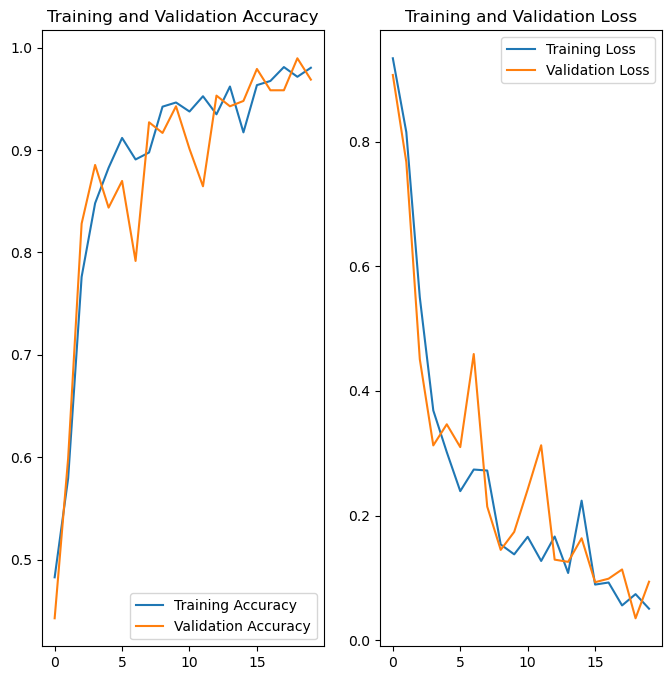

In [28]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 299ms/step
predicted label: Potato___Late_blight


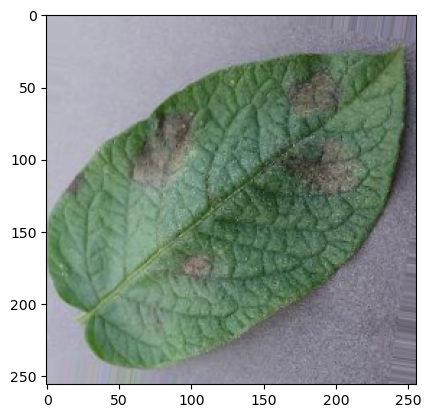

In [37]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [33]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [34]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [38]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 49ms/step


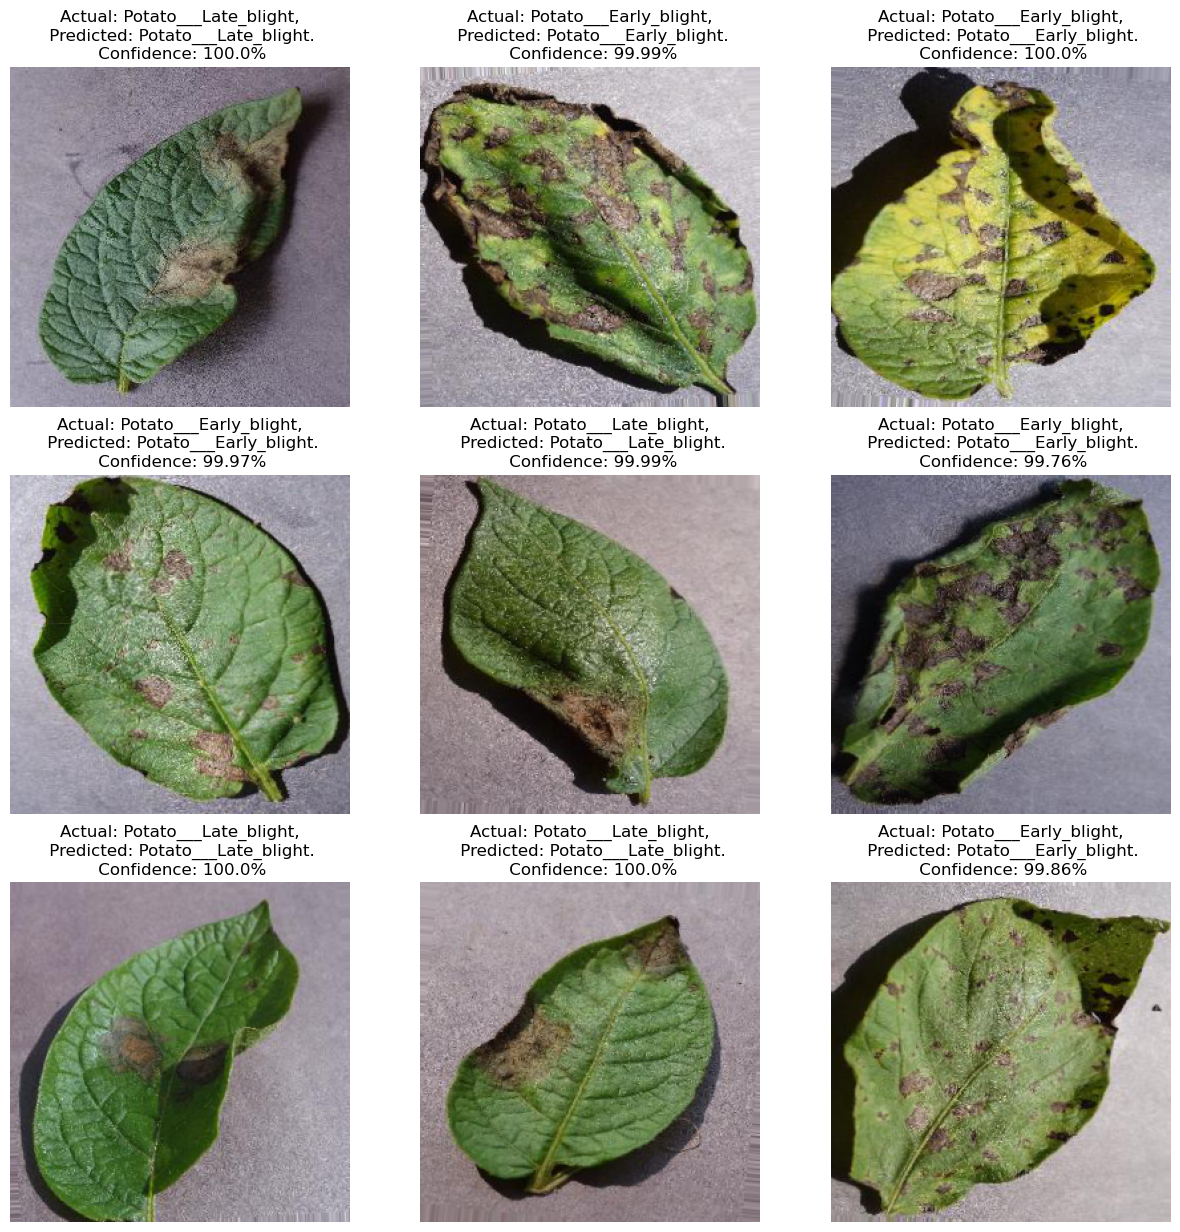

In [39]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [40]:
model.save("../potatoes.h5")

D:\anaconda\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
